# LangGraph Tutorial: Building Real-World Applications

## Overview
This tutorial covers building practical applications with LangGraph, including:
1. 🍽️ Recipe Planner Graph
2. 💪 Workout Recommendation Agent
3. 📊 Data Analyzer Graph
4. 🌤️ Weather Pattern Analyzer

---

## Setup and Imports

In [1]:
# Install required packages (run only if needed)
# !pip install langgraph typing-extensions

# Import required modules
from typing import TypedDict, List
from langgraph.graph import StateGraph
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

print("✅ All imports successful!")
print("🚀 Ready to build LangGraph applications!")

✅ All imports successful!
🚀 Ready to build LangGraph applications!


# Part 1: Recipe Planner Graph

## Objectives:
1. Define an **AgentState** (TypedDict with one `ingredient: str` field)
2. Create a single **node** (`recipe_planner_node`) that suggests recipes based on ingredients
3. Build, compile, and invoke the graph

---

## Step 1: Define the Agent State Schema

The state schema defines the structure of data that flows through our graph.

In [2]:
class RecipeState(TypedDict):
    ingredient: str

print("✅ RecipeState defined with 'ingredient' field")
print("📋 State structure:")
print("   - ingredient: str (main ingredient for recipe suggestion)")

✅ RecipeState defined with 'ingredient' field
📋 State structure:
   - ingredient: str (main ingredient for recipe suggestion)


## Step 2: Define the Recipe Planning Node

Nodes are functions that process and transform the state data.

In [3]:
def recipe_planner_node(state: RecipeState) -> RecipeState:
    """
    Simple node that suggests a recipe based on a main ingredient.
    Takes an ingredient and returns a recipe suggestion.
    """
    print(f"📥 Input to recipe_planner_node: {state}")
    
    ingredient = state["ingredient"]
    
    # Create recipe suggestions based on ingredient
    recipes = {
        "chicken": "Herb-Roasted Chicken with garlic and rosemary",
        "pasta": "Creamy Carbonara with parmesan and bacon",
        "tomatoes": "Fresh Caprese Salad with mozzarella and basil",
        "rice": "Spanish Paella with saffron and seafood",
        "potatoes": "Crispy Garlic Roasted Potatoes with herbs"
    }
    
    recipe = recipes.get(ingredient.lower(), f"Creative {ingredient} stir-fry with vegetables")
    state["ingredient"] = f"Recipe suggestion: {recipe}"
    
    print(f"📤 Output from recipe_planner_node: {state}")
    return state

print("✅ Recipe planner node defined!")

✅ Recipe planner node defined!


## Step 3: Build and Compile the Graph


🔧 Building Recipe Planner Graph...
✅ Graph compiled successfully!
📊 Graph visualization:


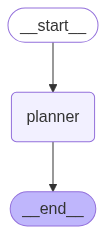

In [4]:
def build_recipe_graph():
    """Build and compile the Recipe Planner graph"""
    print("\n🔧 Building Recipe Planner Graph...")
    
    # Create the graph with our state schema
    graph = StateGraph(state_schema=RecipeState)
    
    # Add our recipe planning node
    graph.add_node("planner", recipe_planner_node)
    
    # Set entry and finish points
    graph.set_entry_point("planner")
    graph.set_finish_point("planner")
    
    # Compile the graph
    app = graph.compile()
    
    print("✅ Graph compiled successfully!")
    print("📊 Graph visualization:")
    
    # Display graph structure
    try:
        display(Image(app.get_graph().draw_mermaid_png()))
    except Exception as e:
        print(f"Note: Graph visualization not available ({e})")
    
    return app

# Build the graph
recipe_app = build_recipe_graph()

## Step 4: Test the Recipe Planner

In [5]:
def test_recipe_planner():
    print("🚀 Testing Recipe Planner Graph...")
    
    # Test with different ingredients
    test_ingredients = ["chicken", "pasta", "broccoli", "salmon"]
    
    for ingredient in test_ingredients:
        print(f"\n--- Planning recipe for: {ingredient} ---")
        result = recipe_app.invoke({"ingredient": ingredient})
        print(f"🍽️ {result['ingredient']}")

# Run the test
test_recipe_planner()

🚀 Testing Recipe Planner Graph...

--- Planning recipe for: chicken ---
📥 Input to recipe_planner_node: {'ingredient': 'chicken'}
📤 Output from recipe_planner_node: {'ingredient': 'Recipe suggestion: Herb-Roasted Chicken with garlic and rosemary'}
🍽️ Recipe suggestion: Herb-Roasted Chicken with garlic and rosemary

--- Planning recipe for: pasta ---
📥 Input to recipe_planner_node: {'ingredient': 'pasta'}
📤 Output from recipe_planner_node: {'ingredient': 'Recipe suggestion: Creamy Carbonara with parmesan and bacon'}
🍽️ Recipe suggestion: Creamy Carbonara with parmesan and bacon

--- Planning recipe for: broccoli ---
📥 Input to recipe_planner_node: {'ingredient': 'broccoli'}
📤 Output from recipe_planner_node: {'ingredient': 'Recipe suggestion: Creative broccoli stir-fry with vegetables'}
🍽️ Recipe suggestion: Creative broccoli stir-fry with vegetables

--- Planning recipe for: salmon ---
📥 Input to recipe_planner_node: {'ingredient': 'salmon'}
📤 Output from recipe_planner_node: {'ingredi

---

# Part 2: Data Analyzer Graph

## Objectives:
- Extend **AgentState** with `numbers: List[int]`, `dataset_name: str`, `analysis_result: str`
- Create a node (`analyze_data_node`) that processes numerical data and generates insights
- Build/invoke the graph with structured inputs

---

## Step 1: Define Extended Agent State Schema

In [9]:
class DataAnalyzerState(TypedDict):
    numbers: List[int]
    dataset_name: str
    analysis_result: str

print("✅ DataAnalyzerState defined with multiple fields:")
print("   - numbers: List[int] (numerical data to analyze)")
print("   - dataset_name: str (descriptive name for the dataset)")
print("   - analysis_result: str (output analysis report)")

✅ DataAnalyzerState defined with multiple fields:
   - numbers: List[int] (numerical data to analyze)
   - dataset_name: str (descriptive name for the dataset)
   - analysis_result: str (output analysis report)


## Step 2: Define the Data Analysis Node

This node will perform statistical analysis on numerical data.

In [10]:
def analyze_data_node(state: DataAnalyzerState) -> DataAnalyzerState:
    """
    Analyzes a dataset and provides statistical insights.
    Takes a list of numbers and generates comprehensive analysis.
    """
    print(f"📥 Input to analyze_data_node: {state}")
    
    numbers = state["numbers"]
    dataset_name = state["dataset_name"]
    
    # Perform statistical analysis
    total_count = len(numbers)
    average = sum(numbers) / total_count
    maximum = max(numbers)
    minimum = min(numbers)
    range_val = maximum - minimum
    
    # Create comprehensive analysis report
    state["analysis_result"] = (
        f"Analysis of {dataset_name} dataset:\n"
        f"• Count: {total_count} data points\n"
        f"• Average: {average:.2f}\n"
        f"• Range: {minimum} to {maximum} (span: {range_val})\n"
        f"• Trend: {'Increasing' if numbers[-1] > numbers[0] else 'Decreasing'}"
    )
    
    print(f"📤 Output from analyze_data_node: {state}")
    return state

print("✅ Data analysis node defined!")

✅ Data analysis node defined!


## Step 3: Build and Compile the Data Analyzer Graph


🔧 Building Data Analyzer Graph...
✅ Data Analyzer Graph compiled!


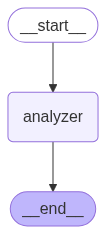

In [11]:
def build_data_analyzer_graph():
    """Build and compile the Data Analyzer graph"""
    print("\n🔧 Building Data Analyzer Graph...")
    
    graph = StateGraph(state_schema=DataAnalyzerState)
    graph.add_node("analyzer", analyze_data_node)
    graph.set_entry_point("analyzer")
    graph.set_finish_point("analyzer")
    
    app = graph.compile()
    print("✅ Data Analyzer Graph compiled!")
    
    # Display graph visualization
    try:
        display(Image(app.get_graph().draw_mermaid_png()))
    except Exception as e:
        print(f"Note: Graph visualization not available ({e})")
    
    return app

# Build the data analyzer graph
data_analyzer_app = build_data_analyzer_graph()

## Step 4: Test the Data Analyzer Graph

In [12]:
def test_data_analyzer():
    print("\n🚀 Testing Data Analyzer Graph...")
    
    # Test cases with different datasets
    test_cases = [
        {"numbers": [85, 92, 78, 96, 88], "dataset_name": "Student Test Scores", "analysis_result": ""},
        {"numbers": [120, 135, 110, 145, 130], "dataset_name": "Daily Sales ($)", "analysis_result": ""},
        {"numbers": [22, 25, 19, 28, 24, 21], "dataset_name": "Temperature (°C)", "analysis_result": ""},
    ]
    
    for i, test_case in enumerate(test_cases, 1):
        print(f"\n--- Dataset {i}: {test_case['dataset_name']} ---")
        print(f"Raw data: {test_case['numbers']}")
        result = data_analyzer_app.invoke(test_case)
        print(f"📊 {result['analysis_result']}")

# Run Data Analyzer example
test_data_analyzer()


🚀 Testing Data Analyzer Graph...

--- Dataset 1: Student Test Scores ---
Raw data: [85, 92, 78, 96, 88]
📥 Input to analyze_data_node: {'numbers': [85, 92, 78, 96, 88], 'dataset_name': 'Student Test Scores', 'analysis_result': ''}
📤 Output from analyze_data_node: {'numbers': [85, 92, 78, 96, 88], 'dataset_name': 'Student Test Scores', 'analysis_result': 'Analysis of Student Test Scores dataset:\n• Count: 5 data points\n• Average: 87.80\n• Range: 78 to 96 (span: 18)\n• Trend: Increasing'}
📊 Analysis of Student Test Scores dataset:
• Count: 5 data points
• Average: 87.80
• Range: 78 to 96 (span: 18)
• Trend: Increasing

--- Dataset 2: Daily Sales ($) ---
Raw data: [120, 135, 110, 145, 130]
📥 Input to analyze_data_node: {'numbers': [120, 135, 110, 145, 130], 'dataset_name': 'Daily Sales ($)', 'analysis_result': ''}
📤 Output from analyze_data_node: {'numbers': [120, 135, 110, 145, 130], 'dataset_name': 'Daily Sales ($)', 'analysis_result': 'Analysis of Daily Sales ($) dataset:\n• Count: 5 